# INTRO : **TRANS JAKARTA**


---
- Domain Knowledge:
    - **Raw data**
        - **tahun**: year of the data is collected.
        - **bulan**: month of the data is collected.
        - **jenis**: type of vehicle.
        - **kode_trayek**: route code.
        - **trayek**: route.
        - **jumlah_penumpang**: the number of passengers.
     - **After data manipulation**
        - **Date**: year and month of the data is collected.

# DATA PREPARATION

## Import Library and Dataset

In [64]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('TransJakarta Passengers 2021.csv')
display(df.head(),df.tail())

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3


## Data Understanding and Data Cleaning

### General Information

In this section, we can see general information related to the raw version of the data frame.

In [65]:
display(df.info(), df.describe(), df.describe(exclude='number'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


None

,tahun,bulan,jumlah_penumpang
count,1473.0,1473.000000,1.473000e+03
mean,2021.0,6.534963,8.167586e+04
std,0.0,3.446451,1.265331e+05
min,2021.0,1.000000,0.000000e+00
25%,2021.0,4.000000,2.501600e+04
50%,2021.0,7.000000,4.962800e+04
75%,2021.0,10.000000,7.513800e+04
max,2021.0,12.000000,1.131439e+06


,jenis,kode_trayek,trayek
count,1473,1473,1471
unique,3,135,136
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,848,12,24


<p>From the descriptive analysis of the raw data above, the following insights are obtained:</p>

- Action needed : 
    1. The data types for the year and month are not accurate as they should be in date-time format. This can be addressed by performing a data type conversion.
    2. An additional field named 'Date' is needed by combining the year and month to facilitate data processing.
    3. All columns, except for 'trayek', have a count of 1473 (match with the number of rows in the data frame). Therefore, a thorough check is needed to understand the discrepancy in these numbers.
    4. Further investigation is required regarding the difference in unique values between 'kode_trayek' (135) and 'trayek' (136) since it is assumed that 'kode_trayek' represents a shorthand version of the values in 'trayek'.
    
- Other Insights:
    1. The raw data frame consists of 1473 rows and 6 columns.
    2. The data types for 'jenis', 'kode_trayek', 'trayek', and 'jumlah_penumpang' are already accurate based on the information provided.
    

### General Information Handling

Pada bagian ini kita melakukan penyesuaian-penysuaian data terkait temuan-temuan yang didapatkan pada proses sebulumnya yang perlu ditindaklanjuti.

#### Handling #1
Issue : The data types for the year and month are not accurate as they should be in date-time format. This can be addressed by performing a data type conversion.<br>
Solution: Change the data type to a date-time format.

In [66]:
df['tahun'] = pd.to_datetime(df['tahun'],format='%Y').dt.to_period('Y')
df['bulan'] = pd.to_datetime(df['bulan'], format='%m')
df['bulan'] = df['bulan'].astype(str).str[5:7]

print(f'Data Type:\n- tahun : {df["tahun"].dtypes}\n- bulan : {df["bulan"].dtypes}')


Data Type:
- tahun : period[A-DEC]
- bulan : object


#### Handling #2
Issue : An additional field named 'Date' is needed by combining the year and month of collected data to facilitate data processing.<br>
Solution : Combine both columns and convert the data type to date-time format.

In [67]:
df.insert(0, 'date', pd.to_datetime(df['tahun'].astype(str) + '-' + df['bulan'].astype(str), format='%Y-%m'))

print(f'Field "date" added with data-type: {df["date"].dtypes}, this field containing year and month of the data is collected.')

Field "date" added with data-type: datetime64[ns], this field containing year and month of the data is collected.


#### Handling #3
Issue : Further investigation is required regarding the difference in unique values between 'kode_trayek' (135) and 'trayek' (136) since it is assumed that 'kode_trayek' represents a shorthand version of the values in 'trayek'.<br>
Soultion : cek isi kode_trayek dan trayek

In [68]:
dfTemp = df[['kode_trayek','trayek']].drop_duplicates()
dfTemp

,kode_trayek,trayek
0,JAK.88,Terminal Tanjung Priok - Ancol Barat
1,JAK.85,Bintara - Cipinang Indah
2,JAK.84,Terminal Kampung Melayu - Kapin Raya
3,JAK.80,Rawa Buaya - Rawa Kompeni
4,JA.77,Tanjung Priok - Jembatan Item
...,...,...
796,JAK.10A,NaN
885,JAK.41,Kampung Melayu - Pulo Gadung
1158,JAK. 10B,Gondangdia - Cikini via Kramat Jaya
1441,6Q,Dukuh Atas - Casablanca via Epicentrum Raya


Dari 135 unique value dari field Kode_Trayek, saat disandingkan dengan trayek membengkak menjadi 140 baris, asumsinya adalah terdapat trayek yang memiliki kode_trayek lebih dari 1.

In [69]:
dfTemp2 = dfTemp.groupby('kode_trayek')['trayek'].count().reset_index().sort_values('trayek',ascending=False)
dfTemp2[dfTemp2['trayek']>1]

,kode_trayek,trayek
28,4,2
106,JAK.41,2
64,JAK.01,2
26,3E,2
10,1A,2


In [70]:
dfTemp = df[df['kode_trayek'].isin(['4','JAK.41','JAK.01','3E','1A'])][['kode_trayek','trayek']].drop_duplicates().sort_values('kode_trayek')
dfTemp

,kode_trayek,trayek
115,1A,PIK - Balai Kota
363,1A,Pantai Maju - Balai Kota
226,3E,Sentraland Cengkareng - Puri Kembangan
350,3E,Puri Kembangan - Sentraland Cengkareng
75,4,Pulo Gadung 2 - Tosari
443,4,Pulo Ggadung 2 - Tosari
69,JAK.01,Tanjung Priok - Plumpang
437,JAK.01,Ttanjung Priok - Plumpang
28,JAK.41,Kampung Melayu - Ppulo Gadung
885,JAK.41,Kampung Melayu - Pulo Gadung


In [71]:
display(df[df['kode_trayek']=='1A'].sort_values('bulan'))

,date,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
605,2021-01-01,2021,01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62721
1093,2021-02-01,2021,02,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,50669
363,2021-03-01,2021,03,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,68592
1339,2021-04-01,2021,04,Angkutan Umum Integrasi,1A,PIK - Balai Kota,69934
1217,2021-07-01,2021,07,Angkutan Umum Integrasi,1A,PIK - Balai Kota,29960
115,2021-10-01,2021,10,Angkutan Umum Integrasi,1A,PIK - Balai Kota,67571
1465,2021-11-01,2021,11,Angkutan Umum Integrasi,1A,PIK - Balai Kota,82972
852,2021-12-01,2021,12,Angkutan Umum Integrasi,1A,PIK - Balai Kota,0


- Dari data di atas dapat disimpulkan terdapat perubahan rute trayek 1A pada bulan April. Sebelumnya Pantai Maju - Balai Kota menjadi PIK - Balai Kota. Sehingga untuk keperluan pengolahan data kode_trayek 1A ditambahkan menjadi '1A BARU' untuk trayek 1A PIK - Balai Kota.

- Untuk kode_trayek 3E diasumsikan terdapat kesalahan input yang menyebabkan tertukarnya penamaan 'Sentraland Cengkareng - Puri Kembangan' dan 'Puri Kembangan - Sentraland Cengkareng'

- Untuk kode_trayek 4, JAK.01, dan JAK.41 diasumsikan terdapat typo dikarenakan human error.

In [72]:
df.loc[df['trayek'] == 'PIK - Balai Kota', 'kode_trayek'] = '1ABARU'
df.loc[df['kode_trayek'] == '3E', 'trayek'] = 'Puri Kembangan - Sentraland Cengkareng'
df.loc[df['kode_trayek'] == '4', 'trayek'] = 'Pulo Gadung 2 - Tosari'
df.loc[df['kode_trayek'] == 'JAK.01', 'trayek'] = 'Tanjung Priok - Plumpang'
df.loc[df['kode_trayek'] == 'JAK.41', 'trayek'] = 'Kampung Melayu - Pulo Gadung'

In [73]:
dfTemp = df[df['kode_trayek'].isin(['4','JAK.41','JAK.01','3E','1A','1A BARU'])][['kode_trayek','trayek']].drop_duplicates().sort_values('kode_trayek')
dfTemp

,kode_trayek,trayek
363,1A,Pantai Maju - Balai Kota
226,3E,Puri Kembangan - Sentraland Cengkareng
75,4,Pulo Gadung 2 - Tosari
69,JAK.01,Tanjung Priok - Plumpang
28,JAK.41,Kampung Melayu - Pulo Gadung


In [74]:
df.describe(exclude='number')

,date,tahun,bulan,jenis,kode_trayek,trayek
count,1473,1473,1473,1473,1473,1471
unique,NaN,1,12,3,135,133
top,NaN,2021,11,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,NaN,1473,129,848,12,24
mean,2021-06-17 13:23:35.071283200,NaN,NaN,NaN,NaN,NaN
min,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
25%,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
50%,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
75%,2021-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN
max,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [75]:
dfTemp = df[['kode_trayek','trayek']].drop_duplicates()
dfTemp
dfTemp.groupby('trayek')['kode_trayek'].count().reset_index().sort_values('kode_trayek',ascending=False)


,trayek,kode_trayek
12,Cililitan - Condet via Kayu Manis,2
122,Tanjung Priok - Jembatan Item,2
0,Andara - Stasiun Universitas Pancasila,1
83,Pulo Gebang - Pulo Gadung 2 via PIK,1
85,Puri Kembangan - Sentraland Cengkareng,1
...,...,...
39,Kampung Melayu - Pondok Kelapa,1
38,Kampung Melayu - Duren Sawit,1
37,Kampung Melayu - Ancol,1
36,Kalimalang - Duren Sawit,1


In [76]:
dfTemp = df[df['trayek'].isin(['Cililitan - Condet via Kayu Manis', 'Tanjung Priok - Jembatan Item'])].sort_values(['trayek','bulan'])
dfTemp

,date,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
522,2021-01-01,2021,01,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026
542,2021-01-01,2021,01,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,55944
1011,2021-02-01,2021,02,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,48742
1031,2021-02-01,2021,02,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,55253
276,2021-03-01,2021,03,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,62773
296,2021-03-01,2021,03,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,76307
1256,2021-04-01,2021,04,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,59481
1276,2021-04-01,2021,04,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,76238
642,2021-05-01,2021,05,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,58115
662,2021-05-01,2021,05,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,71832


- Berdasarkan website https://www.aroengbinang.com/2020/01/rute-transjakarta-pgc-condet-jak-16.html yang mengacu ke http://transjakarta.co.id pada tahun 2018, kode_trayek 'JAK.16' memiliki nama rute PGC - Condet. Sehingga dilakukan penyesuaian untuk value di field trayek dengan kode_trayek 'JAK.16' yang sebelumnya memiliki value 'Cililitan - Condet via Kayu Manis' menjadi 'PGC - Condet'

In [77]:
df.loc[df['kode_trayek'] == 'JAK.16', 'trayek'] = 'PGC - Condet'

Untuk mengatas adanya perbedaan kode_trayek antara 'JA.77' dan 'JAK.77', dapat dilakukan penentuan nama trayek menggunakan pendekatan dengan cara  melihat hubungan antara penamaan kode_trayek dan jenis kendaraannya.

In [78]:
print('Jenis kendaraan Trans Jakarta:\n',df['jenis'].unique())
print('Kode Trayek Jenis Mikrotrans:\n',df[df['jenis']=='Mikrotrans']['kode_trayek'].unique())
print('Kode Trayek Jenis BRT:\n',df[df['jenis']=='BRT']['kode_trayek'].unique())
print('Kode Trayek Jenis Angkutan Umum Integrasi:\n',df[df['jenis']=='Angkutan Umum Integrasi']['kode_trayek'].unique())

Jenis kendaraan Trans Jakarta:
 ['Mikrotrans' 'BRT' 'Angkutan Umum Integrasi']
Kode Trayek Jenis Mikrotrans:
 ['JAK.88' 'JAK.85' 'JAK.84' 'JAK.80' 'JA.77' 'JAK.75' 'JAK.74' 'JAK.73'
 'JAK.72' 'JAK.71' 'JAK.64' 'JAK.61' 'JAK.60' 'JAK.59' 'JAK.58' 'JAK.56'
 'JAK.54' 'JAK.53' 'JAK.52' 'JAK.51' 'JAK.50' 'JAK.49' 'JAK.47' 'JAK.46'
 'JAK.45' 'JAK.44' 'JAK.43' 'JAK.42' 'JAK.41' 'JAK.40' 'JAK.39' 'JAK.38'
 'JAK.37' 'JAK.36' 'JAK.35' 'JAK.34' 'JAK.33' 'JAK.32' 'JAK.31' 'JAK.30'
 'JAK.29' 'JAK.28' 'JAK.27' 'JAK.26' 'JAK.25' 'JAK.24' 'JAK.22' 'JAK.21'
 'JAK.20' 'JAK,19' 'JAK.18' 'JAK.17' 'JAK.16' 'JAK.15' 'JAK.14' 'JAK.13'
 'JAK.12' 'JAK.117' 'JAK.112' 'JAK.11' 'JAK.10' 'JAK.09' 'JAK.08' 'JAK.07'
 'JAK.06' 'JAK.05' 'JAK.04' 'JAK.03' 'JAK.02' 'JAK.01' 'JAK.10B' 'JAK.10A'
 'JAK.77' 'JAK. 10B']
Kode Trayek Jenis BRT:
 ['9' '8' '7' '6' '5' '4' '3' '2' '13' '12' '11' '10' '1']
Kode Trayek Jenis Angkutan Umum Integrasi:
 ['9H' '9E' '9D' '8K' '8E' '8D' '8C' '7P' '7D' '7B' '7A' '6R' '6N' '6M'
 '6H' '6C' 

- Dari data di atas dapat diasumsuikan bahwa semua kode_trayek jenis Mikrotrans menggunakan awalan 'JAK', sehingga dapat diasumsikan input dengan kode_trayek 'JA.77' sama dengan kode_trayek 'JAK.77'.
- Didapatkan juga kode_trayek 'JAK. 10B' dan 'JAK.10B' terdindikasi adanya kesalaha input sehingga terdata menjadi 2 value yang berbeda, sehingga diperlukan investigasi lebih lanjut.

In [79]:
df.loc[df['trayek'] == 'Tanjung Priok - Jembatan Item', 'kode_trayek'] = 'JAK.77'

In [80]:
df[df['kode_trayek'].isin(['JAK.10B', 'JAK. 10B'])]

,date,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
304,2021-03-01,2021,03,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828
795,2021-12-01,2021,12,Mikrotrans,JAK.10B,NaN,4085
1158,2021-07-01,2021,07,Mikrotrans,JAK. 10B,Gondangdia - Cikini via Kramat Jaya,3136
1404,2021-11-01,2021,11,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008


Dari data di atas dapat diasumsikan:
- kode_trayek 'JAK.10B' dan 'JAK. 10B' memiliki nama trayek yang sama, sehingga dapat dilakukan penyesuaian kode_trayek 'JAK. 10B' menjadi 'JAK.10B' (format menyesuakan dengan kode_trayek yang lainnya)
- Terdapat nama trayek JAK.10B yang masih ber-value NaN dan nama trayek JAK. 10B memiliki value 'Gondangdia - Cikini via Kramat ***Jaya***'. sehingga dapat dilakukan pengisian nama trayek dengan value 'Gondangdia - Cikini via Kramat Raya'

In [81]:
df.loc[df['kode_trayek'] == 'JAK. 10B', 'kode_trayek'] = 'JAK.10B'
df.loc[df['kode_trayek'] == 'JAK.10B', 'trayek'] = df.loc[df['kode_trayek'] == 'JAK.10B', 'trayek'].fillna('Gondangdia - Cikini via Kramat Raya')
df.loc[df['kode_trayek'] == 'JAK.10B', 'trayek'] = 'Gondangdia - Cikini via Kramat Raya'

In [82]:
df.describe(exclude='number')

,date,tahun,bulan,jenis,kode_trayek,trayek
count,1473,1473,1473,1473,1473,1472
unique,NaN,1,12,3,133,133
top,NaN,2021,11,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat
freq,NaN,1473,129,848,12,12
mean,2021-06-17 13:23:35.071283200,NaN,NaN,NaN,NaN,NaN
min,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
25%,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
50%,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
75%,2021-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN
max,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN


#### Handling #4
Issue : All columns, except for 'trayek', have a count of 1473 (matching the number of rows in the data frame). Therefore, a thorough check is needed to understand the discrepancy in these numbers.<br>
Solution : 

In [83]:
print(f'Check Null Values on kode_trayek and trayek')
display(df[['kode_trayek','trayek']].isna().sum())

Check Null Values on kode_trayek and trayek


kode_trayek    0
trayek         1
dtype: int64

In [84]:
print(f'Total of 1 null values detected on trayek field.')
dfTemp = df[df['trayek'].isnull()]
display(dfTemp)

Total of 1 null values detected on trayek field.


,date,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
796,2021-12-01,2021,12,Mikrotrans,JAK.10A,NaN,33992


In [85]:
print(f'The Null values on trayek refers to kode_trayek: {dfTemp["kode_trayek"].unique()}')
df[['kode_trayek','trayek']][(df['kode_trayek'].isin(['JAK.10A'])) & (df['trayek'].isna()==False)].drop_duplicates()

The Null values on trayek refers to kode_trayek: ['JAK.10A']


,kode_trayek,trayek
305,JAK.10A,Gondangdia - Cikini via Salemba Raya


In [86]:
print(f'Fill the null Value on trayek with existing kode_trayek value')

df.loc[df['kode_trayek'] == 'JAK.10A', 'trayek'] = df.loc[df['kode_trayek'] == 'JAK.10A', 'trayek'].fillna('Gondangdia - Cikini via Salemba Raya')
display(df.iloc[796])

Fill the null Value on trayek with existing kode_trayek value


date                                 2021-12-01 00:00:00
tahun                                               2021
bulan                                                 12
jenis                                         Mikrotrans
kode_trayek                                      JAK.10A
trayek              Gondangdia - Cikini via Salemba Raya
jumlah_penumpang                                   33992
Name: 796, dtype: object

In [87]:
df.describe(exclude='number')

,date,tahun,bulan,jenis,kode_trayek,trayek
count,1473,1473,1473,1473,1473,1473
unique,NaN,1,12,3,133,133
top,NaN,2021,11,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat
freq,NaN,1473,129,848,12,12
mean,2021-06-17 13:23:35.071283200,NaN,NaN,NaN,NaN,NaN
min,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
25%,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
50%,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
75%,2021-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN
max,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN


## Data Cleaning Advance

Dari semua issue yang ditemukan pada bagian General Information telah berhasil dilakukan penanganan dengan solusinya masing-masing. Selanjutnya data akan dibersihkan dan/atau direview dengan tahapan berikut:

1. Data-Type Handling
2. N/A (Null) Handling
3. Anomali Handling
4. Duplicate Handling

### Unnecessary Columns Handling

In [88]:
display(df.describe(include='all'))

,date,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
count,1473,1473,1473,1473,1473,1473,1.473000e+03
unique,NaN,1,12,3,133,133,NaN
top,NaN,2021,11,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,NaN
freq,NaN,1473,129,848,12,12,NaN
mean,2021-06-17 13:23:35.071283200,NaN,NaN,NaN,NaN,NaN,8.167586e+04
min,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2.501600e+04
50%,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,4.962800e+04
75%,2021-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,7.513800e+04
max,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.131439e+06


In [89]:
df.groupby(['date','tahun','bulan'])['trayek'].count()

date        tahun  bulan
2021-01-01  2021   01       120
2021-02-01  2021   02       119
2021-03-01  2021   03       124
2021-04-01  2021   04       120
2021-05-01  2021   05       125
2021-06-01  2021   06       122
2021-07-01  2021   07       126
2021-08-01  2021   08       122
2021-09-01  2021   09       122
2021-10-01  2021   10       122
2021-11-01  2021   11       129
2021-12-01  2021   12       122
Name: trayek, dtype: int64

Dari data di atas, kolom 'date' menunjukan bahwa 'tahun' dan 'bulan' sudah terakomodir, sehingga tidak diperlukan lagi kolom 'tahun' dan 'bulan'.

In [90]:
df.drop(['tahun','bulan'],inplace=True,axis=1)
df

,date,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021-10-01,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021-10-01,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021-10-01,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021-10-01,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021-10-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...
1468,2021-11-01,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021-11-01,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021-11-01,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021-11-01,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


### Data-Type Handling

In [91]:
df.dtypes

date                datetime64[ns]
jenis                       object
kode_trayek                 object
trayek                      object
jumlah_penumpang             int64
dtype: object

Dari hasil di atas, semua tipe data sudah sesuai dengan kebutuhan pengolahan lanjutan. Sehingga, tidak perlu dilakukan penanganan lebih lanjut.

### N/A (Null) Handling

In [92]:
df.isna().sum()

date                0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

Dari hasil di atas, semua field sudah tidak ada lagi yang bernilai NaN (Null). Sehingga, tidak perlu dilakukan penanganan lebih lanjut.

### Standarize Handling

Data dilakukan standarisasi penulisan agar menghilangkan whitespace dan format penamaan dengan code berikut:

In [93]:
df['jenis'] = df['jenis'].str.strip()
df['jenis'] = df['jenis'].str.lower()
df['kode_trayek'] = df['kode_trayek'].str.strip() 
df['kode_trayek'] = df['kode_trayek'].str.upper()  
df['trayek'] = df['trayek'].str.strip() 
df['trayek'] = df['trayek'].str.title()  

In [94]:
display(df.describe(include='all'))

,date,jenis,kode_trayek,trayek,jumlah_penumpang
count,1473,1473,1473,1473,1.473000e+03
unique,NaN,3,132,133,NaN
top,NaN,mikrotrans,3E,Terminal Tanjung Priok - Ancol Barat,NaN
freq,NaN,848,13,12,NaN
mean,2021-06-17 13:23:35.071283200,NaN,NaN,NaN,8.167586e+04
min,2021-01-01 00:00:00,NaN,NaN,NaN,0.000000e+00
25%,2021-04-01 00:00:00,NaN,NaN,NaN,2.501600e+04
50%,2021-07-01 00:00:00,NaN,NaN,NaN,4.962800e+04
75%,2021-10-01 00:00:00,NaN,NaN,NaN,7.513800e+04
max,2021-12-01 00:00:00,NaN,NaN,NaN,1.131439e+06


Didapatkan kembali 'kode_trayek' dan 'trayek' tidak sama jumlahnya, sehingga diperlukan pengcekan lebih lanjut.

In [95]:
dfTemp = df[['kode_trayek','trayek']].drop_duplicates()
dfTemp
dfTemp.groupby('kode_trayek')['trayek'].count().reset_index().sort_values('trayek',ascending=False).head()

,kode_trayek,trayek
26,3E,2
0,1,1
84,JAK.21,1
97,JAK.35,1
96,JAK.34,1


In [96]:
df[df['kode_trayek']=='3E'].sort_values('date')

,date,jenis,kode_trayek,trayek,jumlah_penumpang
594,2021-01-01,angkutan umum integrasi,3E,Puri Kembangan - Sentraland Cengkareng,24385
1082,2021-02-01,angkutan umum integrasi,3E,Puri Kembangan - Sentraland Cengkareng,17495
350,2021-03-01,angkutan umum integrasi,3E,Puri Kembangan - Sentraland Cengkareng,23513
1328,2021-04-01,angkutan umum integrasi,3E,Puri Kembangan - Sentraland Cengkareng,23523
715,2021-05-01,angkutan umum integrasi,3E,Puri Kembangan - Sentraland Cengkareng,22119
472,2021-06-01,angkutan umum integrasi,3E,Puri Kembangan - Sentraland Cengkareng,23236
1204,2021-07-01,angkutan umum integrasi,3E,Sentraland Cengkareng - Puri Kembangan,12046
226,2021-08-01,angkutan umum integrasi,3E,Puri Kembangan - Sentraland Cengkareng,16416
961,2021-09-01,angkutan umum integrasi,3E,Puri Kembangan - Sentraland Cengkareng,22173
104,2021-10-01,angkutan umum integrasi,3E,Sentraland Cengkareng - Puri Kembangan,24133


- Didapatkan adanya nama trayek yang tertukar. Seharusnya 'Puri Kembangan - Sentraland Cengkareng' menjadi 'Sentraland Cengkareng - Puri Kembangan'. Sehingga dapat dilakukan penyesuain nama 'trayek'

- Didapatkan adanya date yang sama untuk jumlah_penumpang yang berbeda. Sehingga dapat dilakukan penambahan untuk field-field yang sama selain 'jumlah_penumpang' yang dapat dilakukan untuk seluruh data.

In [97]:
df.loc[df['kode_trayek'] == '3E', 'trayek'] = 'Puri Kembangan - Sentraland Cengkareng'

In [98]:
print(f'Shape before\t: {df.shape}')
df = df.groupby(['date','jenis','kode_trayek','trayek'])[['jumlah_penumpang']].sum().reset_index()
print(f'Shape after\t: {df.shape}')

Shape before	: (1473, 5)
Shape after	: (1472, 5)


### Outliers (Anomali) Handling

In [99]:
pd.set_option('display.max_colwidth', len(df))
listField = []
for col in df.columns :
    listField.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listField)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,date,12,"[2021-01-01 00:00:00, 2021-02-01 00:00:00, 2021-03-01 00:00:00, 2021-04-01 00:00:00, 2021-05-01 00:00:00, 2021-06-01 00:00:00, 2021-07-01 00:00:00, 2021-08-01 00:00:00, 2021-09-01 00:00:00, 2021-10-01 00:00:00, 2021-11-01 00:00:00, 2021-12-01 00:00:00]"
1,jenis,3,"[angkutan umum integrasi, brt, mikrotrans]"
2,kode_trayek,132,"[10K, 11D, 11Q, 12B, 1A, 1B, 1C, 1E, 1F, 1H, 1M, 1N, 1P, 1Q, 1R, 3E, 4B, 4F, 5B, 5F, 5M, 6C, 6H, 6M, 6R, 7A, 7B, 7D, 7P, 8C, 8D, 8E, 8K, 9D, 9E, GR4, GR5, 1, 10, 11, 12, 13, 2, 3, 4, 5, 6, 7, 8, 9, JAK,19, JAK.01, JAK.02, JAK.03, JAK.04, JAK.05, JAK.06, JAK.07, JAK.08, JAK.09, JAK.10, JAK.11, JAK.112, JAK.117, JAK.12, JAK.13, JAK.14, JAK.15, JAK.16, JAK.17, JAK.18, JAK.20, JAK.21, JAK.22, JAK.24, JAK.25, JAK.26, JAK.27, JAK.28, JAK.29, JAK.30, JAK.31, JAK.32, JAK.33, JAK.34, JAK.35, JAK.36, JAK.37, JAK.38, JAK.39, JAK.40, JAK.41, JAK.42, JAK.43, JAK.44, JAK.45, JAK.46, JAK.47, JAK.49, JAK.50, ...]"
3,trayek,132,"[Tanjung Priok - Senen Via Taman Bmw, Pulo Gebang - Pulo Gadung 2 Via Pik, Kampung Melayu - Pulo Gebang Via Bkt, Pluit - Senen, Pantai Maju - Balai Kota, Stasiun Palmerah - Tosari, Pesanggrahan - Blok M, Pondok Labu - Blok M, Stasiun Palmerah - Bundaran Senayan, Tanah Abang - Stasiun Gondangdia, Meruya - Blok M, Tanah Abang - Blok M, Senen - Bundaran Senayan, Rempoa - Blok M, Senen - Tanah Abang, Puri Kembangan - Sentraland Cengkareng, Stasiun Manggarai - Ui, Pinang Ranti - Pulo Gadung, Stasiun Tebet - Bidara Cina, Kampung Melayu - Tanah Abang, Kampung Melayu - Tanah Abang Via Cikini, Stasin Tebet - Karet Via Patra Kuningan, Senen - Lebak Bulus, Stasiun Manggarai - Blok M, Ragunan - Stasin Mrt Fatmawati, Kampung Rambutan - Lebak Bulus, Kampung Rambutan - Blok M, Pancoran - Tmii, Pondok Kelapa - Bkn, Kebayoran Lama - Tanah Abang, Joglo - Blok M, Bintaro - Blok M, Batu Sari-Tanah Abang, Pasar Minggu - Tanah Abang, Kebayoran Lama - Jelambar, Taman Kota Intan - Museum Bahari, Kota Tua Explorer, Blok M - Kota, Tanjung Priok - Pgc 2, Pulo Gebang - Kampung Melayu, Penjaringan - Sunter Bouleverd Barat, Ciledug - Tendean, Pulo Gadung 1 - Harmoni, Kalideres - Pasar Baru, Pulo Gadung 2 - Tosari, Kampung Melayu - Ancol, Ragunan - Dukuh Atas 2, Kampung Rambutan - Kampung Melayu, Lebak Bulus - Harmoni, Pinang Ranti - Pluit, Pinang Ranti - Kampung Rambutan, Tanjung Priok - Plumpang, Kampung Melayu - Duren Sawit, Lebak Bulus - Andara, Grogol - Tubagus Angke..."
4,jumlah_penumpang,1419,"[41881, 61434, 9436, 9506, 62721, 24996, 18502, 76707, 6090, 45597, 29169, 9987, 8793, 29449, 13518, 24385, 31546, 39562, 8008, 18094, 87492, 94200, 15742, 25781, 1780, 47005, 87284, 17464, 27248, 13021, 38523, 21336, 6867, 75918, 15039, 76, 261, 773717, 356211, 134632, 137793, 266290, 323751, 444971, 249575, 400573, 320411, 377657, 419996, 622613, 103680, 56172, 44415, 31712, 45679, 68172, 73456, 41856, 22289, 19924, 48001, 72135, 52710, 67367, 65016, 14490, 74084, 118715, 55944, 33859, 29032, 59451, 56815, 26467, 68914, 56614, 36715, 47626, 63490, 105832, 128066, 55577, 83768, 46531, 68848, 29321, 87842, 46026, 43994, 54414, 41797, 21109, 50456, 74225, 53202, 47171, 59975, 39551, 36662, 61171, ...]"


Dari data diatas dapat disimpulkan sebagai berikut:
- data 'date' sudah sesuai berjumlah 12 (12 bulan). Sehingga, tidak diperlukan tindakan tambahan.
- hanya ada 3 'jenis' kendaraan. Sehingga, tidak diperlukan tindakan tambahan.
- 'kode_trayek' dan 'trayek' berhubungan satu sama lain dan sudah memiliki nilai unique yang sama. Sehingga, tidak diperlukan tindakan tambahan. **Namun diperlukan pengecekan lebih lanjut terkait format penamaan kode_trayek per jenis kendaraan.**
- **'jumlah_penumpang' merupakan data numerical sehingga diperlukan pengecekan lebih lanjut untuk melihat anomali data atau outliersnya.**

#### Field : kode_trayek

In [100]:
listField = []
for col in df['jenis'].unique() :
    listField.append([col, df[df['jenis']==col]['kode_trayek'].nunique(), df[df['jenis']==col]['kode_trayek'].unique()])

tabelDesc = pd.DataFrame(columns=['Jenis Name', 'Number of Unique', 'Unique Sample'],
                     data=listField)
tabelDesc

,Jenis Name,Number of Unique,Unique Sample
0,angkutan umum integrasi,47,"[10K, 11D, 11Q, 12B, 1A, 1B, 1C, 1E, 1F, 1H, 1M, 1N, 1P, 1Q, 1R, 3E, 4B, 4F, 5B, 5F, 5M, 6C, 6H, 6M, 6R, 7A, 7B, 7D, 7P, 8C, 8D, 8E, 8K, 9D, 9E, GR4, GR5, 9H, 2P, 2Q, 6N, 1ABARU, 6F, GR2, GR3, 12A, 6Q]"
1,brt,13,"[1, 10, 11, 12, 13, 2, 3, 4, 5, 6, 7, 8, 9]"
2,mikrotrans,72,"[JAK,19, JAK.01, JAK.02, JAK.03, JAK.04, JAK.05, JAK.06, JAK.07, JAK.08, JAK.09, JAK.10, JAK.11, JAK.112, JAK.117, JAK.12, JAK.13, JAK.14, JAK.15, JAK.16, JAK.17, JAK.18, JAK.20, JAK.21, JAK.22, JAK.24, JAK.25, JAK.26, JAK.27, JAK.28, JAK.29, JAK.30, JAK.31, JAK.32, JAK.33, JAK.34, JAK.35, JAK.36, JAK.37, JAK.38, JAK.39, JAK.40, JAK.41, JAK.42, JAK.43, JAK.44, JAK.45, JAK.46, JAK.47, JAK.49, JAK.50, JAK.51, JAK.52, JAK.53, JAK.54, JAK.56, JAK.58, JAK.59, JAK.60, JAK.61, JAK.64, JAK.71, JAK.72, JAK.73, JAK.74, JAK.75, JAK.77, JAK.80, JAK.84, JAK.85, JAK.88, JAK.10A, JAK.10B]"


Diasumsikan Kode Trayek untuk:
- Angkutan Umum Integrasi hanya mengguanakan Kode Alfanumerik tanpa spesial character
- BRT hanya mengguanakan Numerical
- Mikrotrans menggunakan alfanumerik dengan spesial characer titik (.) dengan format AAA.00 


In [101]:
def kodeTrayekCheck(jenis, kode_trayek):
    if jenis == 'angkutan umum integrasi':
        pattern = r'^[a-zA-Z0-9]+$'
        is_match = bool(re.search(pattern, kode_trayek))
        return is_match
    elif jenis == 'mikrotrans':
        pattern = r'^[JAK]+\.[0-9]+[A-Z]{0,3}$'
        is_match = bool(re.search(pattern, kode_trayek))
        return is_match
    else:
        pattern = r'^[0-9]+$'
        is_match = bool(re.search(pattern, kode_trayek))
        return is_match

In [102]:
dfTemp = df.copy()
#kodeTrayekCheck(df['jenis'],df['kode_trayek'])

dfTemp['KodeTrayekCheck'] = dfTemp.apply(lambda row: kodeTrayekCheck(row['jenis'], row['kode_trayek']), axis=1)
display(dfTemp[['jenis','kode_trayek','KodeTrayekCheck']].head())

print('kode_trayek Error: ')
display(dfTemp[dfTemp['KodeTrayekCheck']==False][['jenis','kode_trayek','KodeTrayekCheck']].drop_duplicates())
#df.apply(kodeTrayekCheck())

,jenis,kode_trayek,KodeTrayekCheck
0,angkutan umum integrasi,10K,True
1,angkutan umum integrasi,11D,True
2,angkutan umum integrasi,11Q,True
3,angkutan umum integrasi,12B,True
4,angkutan umum integrasi,1A,True


kode_trayek Error: 


,jenis,kode_trayek,KodeTrayekCheck
50,mikrotrans,"JAK,19",False


In [103]:
df.loc[df['kode_trayek'] == 'JAK,19', 'kode_trayek'] = 'JAK.19'
dfTemp = df.copy()
dfTemp['KodeTrayekCheck'] = dfTemp.apply(lambda row: kodeTrayekCheck(row['jenis'], row['kode_trayek']), axis=1)
print('kode_trayek Error: ')
display(dfTemp[dfTemp['KodeTrayekCheck']==False][['jenis','kode_trayek','KodeTrayekCheck']].drop_duplicates())

kode_trayek Error: 


,jenis,kode_trayek,KodeTrayekCheck


#### Field : jumlah_penumpang

##### Cek jumlah_penumpang di bawah 0 (invalid)

In [115]:
print(f'jumlah penumpang di bawah 0 = {len(df[df["jumlah_penumpang"]<0])}')
print(f'jumlah penumpang sama dengan 0 = {len(df[df["jumlah_penumpang"]==0])}')
print(f'jumlah penumpang di bawah 0 = {len(df[df["jumlah_penumpang"]<10])}')

jumlah penumpang di bawah 0 = 0
jumlah penumpang sama dengan 0 = 47
jumlah penumpang di bawah 0 = 53
132


Dari data di atas menunjukkan bahwa tidak ada jumlah_penumpang di bawah 0

##### Cek Normalitas Data

Karena jumlah data sebanyak 1472, Tes normalitas data menggunakan Tes Shapiro-Wilk merupakan pilihan yang paling tepat. Maka dari itu, jumlah_penumpang akan dilakukan tes normalitas data menggunakan Tes Shapiro-Wilk

In [106]:
data = df['jumlah_penumpang']

_, p_value = stats.shapiro(data)

alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

The data is not normally distributed.


In [122]:
#len(df[df['jumlah_penumpang']==0])
len(df[(df['jumlah_penumpang']==0) & (df['date']=='2021-12-01')])
#df[(df['jumlah_penumpang']==0) & (df['date']=='2021-12-01')]
#df[(df['jumlah_penumpang']==0)]

35

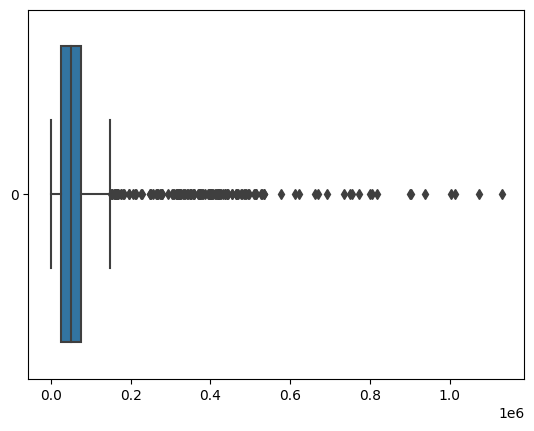

In [108]:
#CEK OUTLIERS JUMLAH PENUMPANG
plt.figure()
sns.boxplot(df['jumlah_penumpang'], orient='h')
plt.show()

In [109]:
q1 = df['jumlah_penumpang'].describe()['25%']
q3 = df['jumlah_penumpang'].describe()['75%']
IQR = q3 - q1
lowerBound = q1 - (1.5*IQR)
upperBound = q3 + (1.5*IQR)

print(f'Jumlah data\t= {len(df)}')
print(f'lower bound\t= {lowerBound}\nupper bound\t= {upperBound}')
display(df[df['jumlah_penumpang']<lowerBound])
display(df[df['jumlah_penumpang']>lowerBound])


Jumlah data	= 1472
lower bound	= -50112.625
upper bound	= 150296.375


,date,jenis,kode_trayek,trayek,jumlah_penumpang


,date,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021-01-01,angkutan umum integrasi,10K,Tanjung Priok - Senen Via Taman Bmw,41881
1,2021-01-01,angkutan umum integrasi,11D,Pulo Gebang - Pulo Gadung 2 Via Pik,61434
2,2021-01-01,angkutan umum integrasi,11Q,Kampung Melayu - Pulo Gebang Via Bkt,9436
3,2021-01-01,angkutan umum integrasi,12B,Pluit - Senen,9506
4,2021-01-01,angkutan umum integrasi,1A,Pantai Maju - Balai Kota,62721
...,...,...,...,...,...
1467,2021-12-01,mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,77697
1468,2021-12-01,mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,70475
1469,2021-12-01,mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,59193
1470,2021-12-01,mikrotrans,JAK.85,Bintara - Cipinang Indah,40103


### Duplicate Handling

In [110]:
df[df.duplicated()==True]

,date,jenis,kode_trayek,trayek,jumlah_penumpang


Dari hasil di atas, semua data sudah tidak ada lagi yang terduplikasi. Sehingga, tidak perlu dilakukan penanganan lebih lanjut.

In [111]:
df.describe(exclude='number')

,date,jenis,kode_trayek,trayek
count,1472,1472,1472,1472
unique,NaN,3,132,132
top,NaN,mikrotrans,10K,Tanjung Priok - Senen Via Taman Bmw
freq,NaN,848,12,12
mean,2021-06-17 11:10:06.521739008,NaN,NaN,NaN
min,2021-01-01 00:00:00,NaN,NaN,NaN
25%,2021-04-01 00:00:00,NaN,NaN,NaN
50%,2021-07-01 00:00:00,NaN,NaN,NaN
75%,2021-10-01 00:00:00,NaN,NaN,NaN
max,2021-12-01 00:00:00,NaN,NaN,NaN


# DATA ANALYST

# KESIMPULAN DAN REKOMENDASI

In [112]:
df[df['kode_trayek'].isin(['1A','1ABARU'])]

,date,jenis,kode_trayek,trayek,jumlah_penumpang
4,2021-01-01,angkutan umum integrasi,1A,Pantai Maju - Balai Kota,62721
124,2021-02-01,angkutan umum integrasi,1A,Pantai Maju - Balai Kota,50669
243,2021-03-01,angkutan umum integrasi,1A,Pantai Maju - Balai Kota,68592
367,2021-04-01,angkutan umum integrasi,1ABARU,Pik - Balai Kota,69934
487,2021-05-01,angkutan umum integrasi,1ABARU,Pik - Balai Kota,62524
612,2021-06-01,angkutan umum integrasi,1ABARU,Pik - Balai Kota,66928
734,2021-07-01,angkutan umum integrasi,1ABARU,Pik - Balai Kota,29960
860,2021-08-01,angkutan umum integrasi,1ABARU,Pik - Balai Kota,35608
982,2021-09-01,angkutan umum integrasi,1ABARU,Pik - Balai Kota,54065
1104,2021-10-01,angkutan umum integrasi,1ABARU,Pik - Balai Kota,67571
